<a href="https://colab.research.google.com/github/123franklin321/meu_primeiro_codigo.py/blob/master/Assimetria.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [12]:
df_stats_code = pd.read_csv('tbl_stats_code.csv')
df_stats_code

,id_stat,stat
0,1,Corners
1,4,Fouls
2,5,Offsides
3,6,Posession
4,2,Shots on target
5,3,Shots wide


In [13]:
df_stats = pd.read_csv('tbl_stats.csv')
df_stats

,id_stat,id_match,id_team,id_stat_code,occurrences/percentage
0,"10,527",762,14,1,5
1,"10,528",762,14,2,1
2,"10,529",762,14,3,3
3,"10,530",762,14,4,14
4,"10,531",762,14,5,2
...,...,...,...,...,...
22699,"33,226","3,801",14,2,3
22700,"33,227","3,801",14,3,6
22701,"33,228","3,801",14,4,11
22702,"33,229","3,801",14,5,1


In [14]:
left_df = df_stats\
    .set_index('id_stat_code')

right_df = df_stats_code\
    .rename(columns={'id_stat':'id_stat_code'})\
    .set_index('id_stat_code')

df_stats_join = left_df\
    .join(right_df, how='left')

df_stats_join

,id_stat,id_match,id_team,occurrences/percentage,stat
id_stat_code,,,,,
1,"10,527",762,14,5,Corners
1,"10,533",762,17,5,Corners
1,"10,539",763,133,5,Corners
1,"10,545",763,11,0,Corners
1,"10,551",764,132,5,Corners
...,...,...,...,...,...
6,"33,206","3,799",4,49,Posession
6,"33,212","3,800",8,51,Posession
6,"33,218","3,800",5,49,Posession


In [22]:
possession = df_stats_join.loc[6]['occurrences/percentage']
possession

id_stat_code
6    53
6    47
6    67
6    33
6    40
     ..
6    49
6    51
6    49
6    53
6    47
Name: occurrences/percentage, Length: 3784, dtype: int64

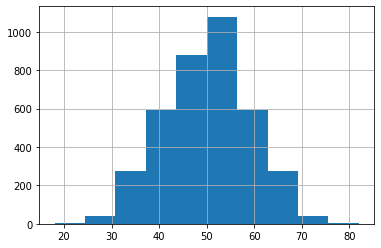

In [23]:
possession.hist()

(array([  1.,   5.,  12.,  29.,  84., 190., 241., 351., 424., 455., 655.,
        424., 351., 241., 168., 106.,  29.,  12.,   5.,   1.]),
 array([18. , 21.2, 24.4, 27.6, 30.8, 34. , 37.2, 40.4, 43.6, 46.8, 50. ,
        53.2, 56.4, 59.6, 62.8, 66. , 69.2, 72.4, 75.6, 78.8, 82. ]),
 <a list of 20 Patch objects>)

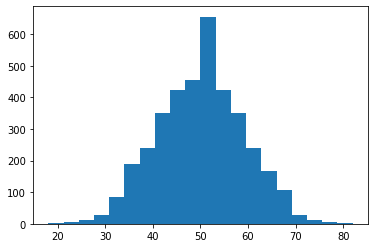

In [27]:
fig, ax = plt.subplots(*(1, 1), figsize=(6, 4))

ax.hist(x=possession, bins=20, histtype='bar')

(array([0.00024775, 0.00169298, 0.01131409, 0.02444503, 0.03629592,
        0.04455437, 0.02444503, 0.01131409, 0.00169298, 0.00024775]),
 array([18. , 24.4, 30.8, 37.2, 43.6, 50. , 56.4, 62.8, 69.2, 75.6, 82. ]),
 <a list of 10 Patch objects>)

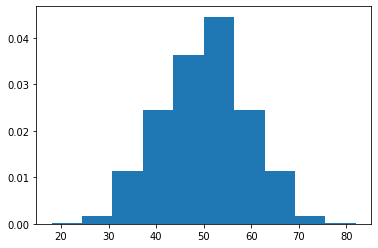

In [28]:
fig, ax = plt.subplots(*(1, 1), figsize=(6, 4))

ax.hist(x=possession, density=True)

In [17]:
possession.agg(['mean', 'median', 'var', 'skew', 'kurtosis'])

mean        50.000000
median      50.000000
var         81.160455
skew         0.000000
kurtosis    -0.189924
Name: occurrences/percentage, dtype: float64

In [18]:
possession_media_zero = (possession - possession.mean())
desvio_padrao = possession.std()

In [19]:
assimetria = (possession_media_zero**3).mean() / (desvio_padrao**3)
assimetria

0.0

In [20]:
curtose = (possession_media_zero**4).mean() / (desvio_padrao**4)
curtose

2.807257612618744

In [21]:
curtose_de_excesso = curtose - 3
curtose_de_excesso

-0.19274238738125593